In [1]:
import pennylane as qml
from pennylane import numpy as np
from matplotlib import pyplot as plt
import time
from supplementary_code import *

In [2]:
nq = 10
depth = int(nq/2)
dev = qml.device("default.qubit", wires= nq) 

In [3]:
Delta = 2.0
H = H_XXZ(Delta,wires=range(nq))

print(H)

  (1) [X0 X1]
+ (1) [Y0 Y1]
+ (1) [X1 X2]
+ (1) [Y1 Y2]
+ (1) [X2 X3]
+ (1) [Y2 Y3]
+ (1) [X3 X4]
+ (1) [Y3 Y4]
+ (1) [X4 X5]
+ (1) [Y4 Y5]
+ (1) [X5 X6]
+ (1) [Y5 Y6]
+ (1) [X6 X7]
+ (1) [Y6 Y7]
+ (1) [X7 X8]
+ (1) [Y7 Y8]
+ (1) [X8 X9]
+ (1) [Y8 Y9]
+ (1) [X9 X0]
+ (1) [Y9 Y0]
+ (2.0) [Z0 Z1]
+ (2.0) [Z1 Z2]
+ (2.0) [Z2 Z3]
+ (2.0) [Z3 Z4]
+ (2.0) [Z4 Z5]
+ (2.0) [Z5 Z6]
+ (2.0) [Z6 Z7]
+ (2.0) [Z7 Z8]
+ (2.0) [Z8 Z9]
+ (2.0) [Z9 Z0]


In [4]:
params = np.array([np.pi for _ in range(4*depth)])

In [5]:
@qml.qnode(dev)
def circuit(params, Delta, depth=depth, nq=nq):
    
    HVA_ansatz(params, Delta, depth, range(nq))
    
    return qml.expval(H)

In [6]:
cost_fn = lambda w: circuit(w, Delta=Delta, depth=depth, nq=nq)

In [7]:
start_time = time.time()    

steps = 200

optimizer = qml.AdamOptimizer(stepsize=0.5)
best_cost = cost_fn(params)
best_params = params

for j in range(steps+1):
    params2 = params
    params, cost = optimizer.step_and_cost(cost_fn, params)

    if cost < best_cost:
        best_params = params2
        best_cost = cost
        
    if j!=0 and j % 2 == 0:
        print(f"Cost at Step {j}: {cost}")

end_time = time.time()
print('Time taken: ', (end_time-start_time)/60, ' mins.')

Cost at Step 2: -12.107485045887335
Cost at Step 4: -4.965209691662563
Cost at Step 6: -5.129390767948391
Cost at Step 8: -6.400066638020295
Cost at Step 10: -9.654403108208442
Cost at Step 12: -15.009455095005233
Cost at Step 14: -12.822316394736362
Cost at Step 16: -18.665439458398307
Cost at Step 18: -19.03002484863451
Cost at Step 20: -19.762947948472092
Cost at Step 22: -20.419779844293153
Cost at Step 24: -23.34300050019606
Cost at Step 26: -21.89017933907407
Cost at Step 28: -23.316552418646747
Cost at Step 30: -22.153031768410997
Cost at Step 32: -23.078708497682594
Cost at Step 34: -23.552577169029256
Cost at Step 36: -23.22866707565963
Cost at Step 38: -23.960805017792275
Cost at Step 40: -23.908803814792865
Cost at Step 42: -23.823157764394217
Cost at Step 44: -24.218606740461492
Cost at Step 46: -24.101675346301505
Cost at Step 48: -24.300285416077887
Cost at Step 50: -24.407291296963063
Cost at Step 52: -24.43978103914956
Cost at Step 54: -24.43872941698314
Cost at Step 56

In [8]:
print(best_cost)

-24.885115971411427


In [9]:
print(cost_fn(best_params))

-24.885115971411427


In [10]:
print(np.array(best_params))

[ 1.78470883  3.07396722  5.52384185  0.37685652  3.94088268  5.44489519
  4.82374831  3.00906953  4.06010607  0.74914111  1.71647988  3.48953109
  3.52627373 -0.08251077  2.54321375  0.29206041  3.06966386  2.96450574
  2.78736854  0.04727826]


In [11]:
for i in range(1,10):
    
    corr = corr_function(i, best_params,Delta,depth, nq)
    
    print(i,np.abs(corr))

1 0.789967069440874
2 0.5745488746431954
3 0.5706386221003072
4 0.5353280390680627
5 0.540244233881462
6 0.5353280390680626
7 0.553013308216459
8 0.5745488746431957
9 0.7658905937834144


In [12]:
# Time evolution

corr_t = []
t = []
i =  3
dt = 1/400

start_time = time.time()    
for step in range(401):
    
    t.append(dt*step)
    
    corr_dt = corr_function(i, best_params, Delta, depth, nq, perturbation='hamiltonian',timesteps=step)
    
    print(step,corr_dt)
    corr_t.append(corr_dt)
    
end_time = time.time()
print('Time taken: ', (end_time-start_time)/60, ' mins.')

0 -0.5706386221003072
1 -0.5706171775379405
2 -0.570549433662525
3 -0.5704354051945514
4 -0.5702751154651705
5 -0.5700685964073808
6 -0.5698158885450553
7 -0.5695170409798318
8 -0.5691721113758521
9 -0.5687811659423749
10 -0.5683442794142557
11 -0.5678615350303
12 -0.5673330245095092
13 -0.5667588480252093
14 -0.5661391141770906
15 -0.5654739399611475
16 -0.564763450737549
17 -0.5640077801964305
18 -0.5632070703216325
19 -0.5623614713523887
20 -0.5614711417429856
21 -0.5605362481203939
22 -0.5595569652398948
23 -0.5585334759387115
24 -0.5574659710876589
25 -0.5563546495408365
26 -0.5551997180833604
27 -0.5540013913771746
28 -0.5527598919049388
29 -0.5514754499120231
30 -0.5501483033466192
31 -0.5487786977979916
32 -0.5473668864328884
33 -0.5459131299301246
34 -0.5444176964133677
35 -0.5428808613821379
36 -0.5413029076410476
37 -0.5396841252273051
38 -0.5380248113364956
39 -0.5363252702466741
40 -0.5345858132407832
41 -0.5328067585274231
42 -0.5309884311599989
43 -0.5291311629542715
44 

338 0.014451110262748756
339 0.013840032326438906
340 0.013222261944310532
341 0.012597990215174965
342 0.011967406179166917
343 0.011330696787763134
344 0.0106880468749046
345 0.010039639129220429
346 0.00938565406735975
347 0.008726270008430514
348 0.008061663049544504
349 0.0073920070424716156
350 0.006717473571401733
351 0.006038231931813964
352 0.005354449110451798
353 0.004666289766403653
354 0.003973916213287465
355 0.0032774884025353057
356 0.0025771639077759867
357 0.0018730979103170342
358 0.0011654431857143766
359 0.0004543500914331311
360 -0.0002600334444059216
361 -0.000977561933201948
362 -0.0016980923349739774
363 -0.002421484066388979
364 -0.003147599007727292
365 -0.003876301508789509
366 -0.00460745839374882
367 -0.005340938964960573
368 -0.006076615005732144
369 -0.00681436078206149
370 -0.007554053043352382
371 -0.008295571022114284
372 -0.009038796432655566
373 -0.00978361346877843
374 -0.01052990880048274
375 -0.011277571569694694
376 -0.012026493385019543
377 -0.

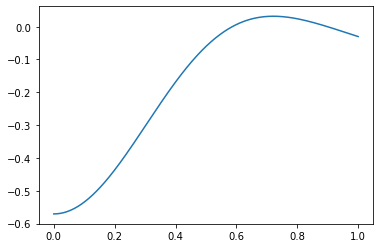

In [14]:
plt.plot(np.linspace(0,1,401),np.real(corr_t))

In [15]:
np.array(corr_t)

tensor([-5.70638622e-01, -5.70617178e-01, -5.70549434e-01,
        -5.70435405e-01, -5.70275115e-01, -5.70068596e-01,
        -5.69815889e-01, -5.69517041e-01, -5.69172111e-01,
        -5.68781166e-01, -5.68344279e-01, -5.67861535e-01,
        -5.67333025e-01, -5.66758848e-01, -5.66139114e-01,
        -5.65473940e-01, -5.64763451e-01, -5.64007780e-01,
        -5.63207070e-01, -5.62361471e-01, -5.61471142e-01,
        -5.60536248e-01, -5.59556965e-01, -5.58533476e-01,
        -5.57465971e-01, -5.56354650e-01, -5.55199718e-01,
        -5.54001391e-01, -5.52759892e-01, -5.51475450e-01,
        -5.50148303e-01, -5.48778698e-01, -5.47366886e-01,
        -5.45913130e-01, -5.44417696e-01, -5.42880861e-01,
        -5.41302908e-01, -5.39684125e-01, -5.38024811e-01,
        -5.36325270e-01, -5.34585813e-01, -5.32806759e-01,
        -5.30988431e-01, -5.29131163e-01, -5.27235292e-01,
        -5.25301165e-01, -5.23329131e-01, -5.21319550e-01,
        -5.19272786e-01, -5.17189208e-01, -5.15069195e-0